In [71]:
import framecare as fc
gpd_overlaps, sw_overlaps_dict = fc.extract_burst_overlaps(frame)

In [76]:
def gpd_swath_overlap(df):
    '''
    first run, gpd_overlaps, sw_overlaps_dict = fc.extract_burst_overlaps(frame)
    afterwards this function create_swath_overlap columns to match the ctr_lat,lon with the main df.
    '''
    df['swath_overlap'] = None  # Initialize the new column

    # Group by 'swath_1' and calculate cumulative count for each group
    df['overlap_count'] = df.groupby('swath_1').cumcount() + 1

    # Create 'swath_overlap' column based on 'swath_1' and the cumulative count
    df['swath_overlap'] = df.apply(lambda row: f"{row['swath_1']}-{row['overlap_count']}", axis=1)

    # Drop the helper column
    df.drop(columns=['overlap_count'], inplace=True)

    return df

gpd_swath_overlap(gpd_overlaps)

,burstID_1,swath_1,burstID_2,swath_2,geometry,swath_overlap,center_lat,center_lon
0,27_IW1_6297,1,27_IW1_6325,1,"POLYGON ((73.34362 38.90430, 73.85324 38.98181...",1-1,38.964791,73.860779
1,27_IW1_6352,1,27_IW1_6325,1,"POLYGON ((73.30592 39.05529, 73.30223 39.07006...",1-2,39.130556,73.820660
2,27_IW1_6352,1,27_IW1_6380,1,"POLYGON ((73.26074 39.23581, 73.77288 39.31335...",1-3,39.296312,73.780442
3,27_IW1_6408,1,27_IW1_6380,1,"POLYGON ((73.22302 39.38604, 73.21913 39.40154...",1-4,39.462057,73.740129
4,27_IW1_6408,1,27_IW1_6435,1,"POLYGON ((73.17742 39.56727, 73.69213 39.64484...",1-5,39.627745,73.699384
...,...,...,...,...,...,...,...,...
69,27_IW3_6868,3,27_IW3_6840,3,"POLYGON ((74.57665 42.42927, 74.57325 42.44409...",3-20,42.489614,75.079273
70,27_IW3_6868,3,27_IW3_6895,3,"POLYGON ((74.53519 42.60966, 75.02671 42.67186...",3-21,42.655143,75.042585
71,27_IW3_6923,3,27_IW3_6895,3,"POLYGON ((74.50077 42.75905, 74.49704 42.77521...",3-22,42.820663,75.005823
72,27_IW3_6923,3,27_IW3_6951,3,"POLYGON ((74.95304 43.00290, 75.42918 43.06074...",3-23,42.986350,74.970451


In [1]:
maindir='/home/users/mnergiz/daz_esd_env/'

import os
import pandas as pd
import math
import numpy as np
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
import warnings
import sys
warnings.filterwarnings("ignore")
# Add the parent directory to the sys.path
current_dir = os.getcwd()
# Construct the path to the 'lib' directory
lib_path = os.path.abspath(os.path.join(current_dir,'../lib'))
if lib_path not in sys.path:
    sys.path.append(lib_path)
from daz_esd_lib import *


setting pyproj data directory


In [2]:
daz_bovl= pd.read_csv('/work/scratch-pw3/licsar/mnergiz/batchdir/daz_esd/027A_04887_262625.csv')

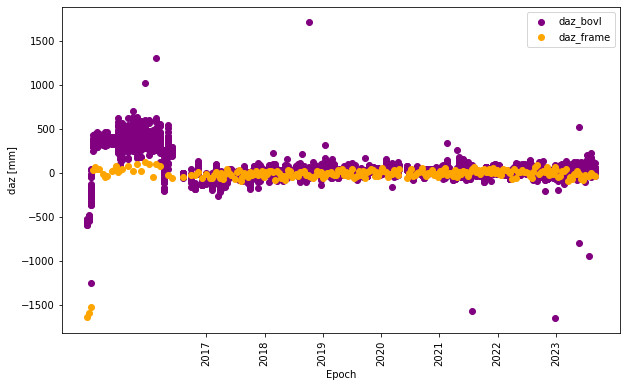

In [50]:
# Create the plot
fig = plt.figure(figsize=(10, 6))
x1=daz_bovl['epoch']
y2 = daz_bovl['daz_bovl_noiono']
y3 = daz_bovl['daz_bovl_noiono']
#plt.scatter(x1, y3, label='daz_iono_bovl', color='red')
plt.scatter(x1, y2, label='daz_bovl', color='purple')

x = daz_milan_027['epochdate']
y = daz_milan_027['daz_mm']
#plt.scatter(x, y, label='daz_iono_frame', color='blue')
y1 = daz_milan_027['daz_mm']
plt.scatter(x, y1, label='daz_frame', color='orange')

# y2 = df[daz_set]
# plt.scatter(x, y2, label='daz_tide_mm', color='green')
plt.xlabel('Epoch')
plt.ylabel('daz [mm]')

# # Get the minimum and maximum dates from x
# min_date = daz_milan_027['epochdate'].min().date()
# max_date = daz_milan_027['epochdate'].max().date()

# Calculate the number of years between the minimum and maximum dates
num_years = max_date.year - min_date.year + 1

# Set the x-axis tick locations and labels
xticks = pd.date_range(start=min_date, end=max_date, freq='YS')  # Year start frequency
xticks_labels = [date.strftime('%Y') for date in xticks]

plt.xticks(xticks, xticks_labels, rotation='vertical')

# Display the plot
plt.legend()
plt.show()

In [3]:
data_fold='/work/scratch-pw3/licsar/mnergiz/batchdir/daz_esd/'
esds_path=os.path.join(data_fold, '027A_04887_262625.esds_step5.csv')
frame_path=os.path.join(data_fold, '027A_04887_262625.frame_step5.csv')
esds_step5=pd.read_csv(esds_path)
frame_step5=pd.read_csv(frame_path)

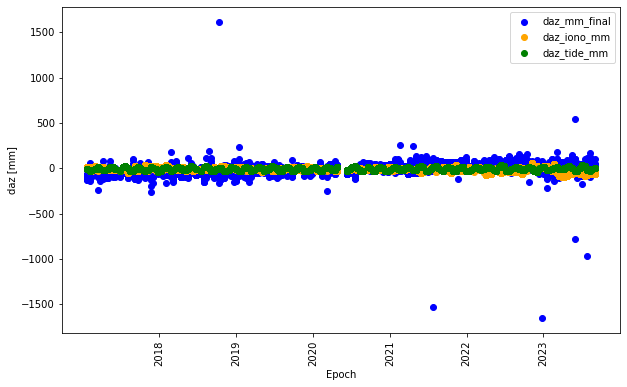

In [9]:
daz_plot_esd(esds_step5, daz_orig='daz_mm_final', daz_ion='daz_iono_mm',daz_set='daz_tide_mm')

In [7]:
esds_step5.columns

Index(['Unnamed: 0', 'epoch', 'master', 'swath_overlap', 'ph_mean',
       'icc_offset', 'esd_it1', 'esd_it2', 'scale_factor', 'az_pix', 'ka',
       'dfDC', 'daz_bovl', 'S1AorB', 'center_range', 'center_time',
       'center_lon', 'center_lat', 'heading', 'incidence', 'daz_tide_mm',
       'tecs_A', 'tecs_B', 'daz_iono_mm', 'daz_bovl_noiono',
       'years_since_beginning', 'daz_bovl_notide', 'daz_bovl_notide_noiono',
       'daz_mm_final', 'is_outlier_daz_bovl_notide_noiono'],
      dtype='object')

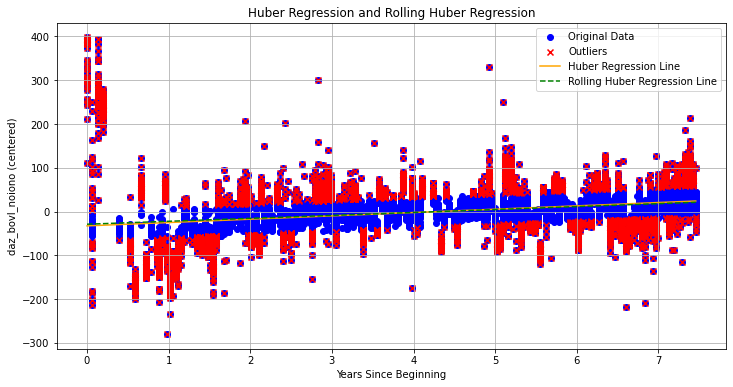

In [8]:


# Plotting the data
plt.figure(figsize=(12, 6))
plt.scatter(x, y, color='blue', label='Original Data')
plt.scatter(esds[esds['is_outlier']]['years_since_beginning'], esds[esds['is_outlier']]['daz_bovl_noiono'], color='red', label='Outliers', marker='x')
plt.plot(x, y_pred, color='orange', label='Huber Regression Line')
if roll_assist:
    plt.plot(x, y_pred_roll, color='green', linestyle='--', label='Rolling Huber Regression Line')
plt.xlabel('Years Since Beginning')
plt.ylabel('daz_bovl_noiono (centered)')
plt.title('Huber Regression and Rolling Huber Regression')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# daz_bovl['daz_total']=(daz_bovl['icc_offset']+daz_bovl['esd_it1']+daz_bovl['esd_offset'])*daz_bovl['az_pix']*1000
# daz_bovl['daz_icc_esd1']=(daz_bovl['icc_offset']+daz_bovl['esd_it1'])*daz_bovl['az_pix']*1000
# daz_bovl['daz_esds']=(daz_bovl['esd_offset']+daz_bovl['esd_it1'])*daz_bovl['az_pix']*1000
# daz_bovl['daz_icc_esd2']=(daz_bovl['icc_offset']+daz_bovl['esd_offset'])*daz_bovl['az_pix']*1000
# daz_bovl['daz_wrt2']=(daz_bovl['daz_total_wrt_orbits']+daz_bovl['esd_offset'])*daz_bovl['az_pix']*1000
# daz_bovl['daz_wrt']=(daz_bovl['daz_total_wrt_orbits'])*daz_bovl['az_pix']*1000
# daz_plot_esd(daz_bovl, frame, daz_orig='',daz_set='daz_wrt2', daz_ion='daz_bovl' )

In [ ]:
This code provides the velocity of each burst overlap.
'''
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_squared_error
# Empty list for velocity
velocity_list = []
# Loop for each burst overlap.
rmse_dict = {}
for swath_overlap_value in swath_overlap_values:

    subset_df = df_epoch[df_epoch['Swath_Overlap'] == swath_overlap_value].copy()
        
    ##remove the outlier
    upper_lim=subset_df['daz_bovl_no_it'].mean()+2*subset_df['daz_bovl_no_it'].std()
    lower_lim=subset_df['daz_bovl_no_it'].mean()-2*subset_df['daz_bovl_no_it'].std()
    subset_df=subset_df.loc[(subset_df['daz_bovl_no_it'] < upper_lim) & (subset_df['daz_bovl_no_it'] > lower_lim)]

    from sklearn.linear_model import LinearRegression
    start_time = subset_df['Epoch'].iloc[0]
    
    ### Here eleminate the NaN cc values to process the regresion and making plot.
    subset_df.dropna(inplace=True)
    
    # Convert the time values to relative dates.
    subset_df['Days'] = (subset_df['Epoch'] - start_time) / np.timedelta64(1, 'Y')
    
    # Predict the velocity
    X = subset_df[['Days']].values
    y1 = subset_df['daz_bovl_no_it'].values

    """
    # Fit the linear regression model to the data
    reg1 = LinearRegression()
    reg1.fit(X, y1)

    # Use the model to predict the velocities
    subset_df['model_disp'] = reg1.predict(X)
    first_r_dsp = subset_df['model_disp'].iloc[0]
    last_r_dsp = subset_df['model_disp'].iloc[-1]

    subset_df['velocity'] = (last_r_dsp - first_r_dsp) / subset_df['Days'].max()

    # Record the output of the list 
    velocity_list.append(subset_df)
    """
    # Create a HuberRegressor instance
    reg1 = HuberRegressor(epsilon=1.35, alpha=1.0)

    # Fit the HuberRegressor model to the data
    reg1.fit(X, y1)

    # Use the model to predict the velocities
    subset_df['model_disp'] = reg1.predict(X)
    first_r_dsp = subset_df['model_disp'].iloc[0]
    last_r_dsp = subset_df['model_disp'].iloc[-1]

    subset_df['velocity'] = (last_r_dsp - first_r_dsp) / subset_df['Days'].max()

    # Record the output of the list 
    velocity_list.append(subset_df)


    
    ##illustration
    
    x = subset_df['Epoch']
    y = subset_df['daz_bovl_no_it']
    z = subset_df['model_disp']
    velocities = subset_df['velocity']
    velocity_value = velocities.iloc[0]  

    # Calculate difference between model values and actual values
    diff = z - y
    # Calculate RMSE
    #rmse = np.sqrt(np.mean(diff ** 2))
    rmse = np.sqrt(np.sum(diff**2)/diff.size)
    # Store RMSE in the dictionary using swath_overlap_value as the key
    rmse_dict[swath_overlap_value] = rmse

    ##color the icc zero
    df_icc= subset_df[['Epoch', 'u_icc']]
    df_icc = df_icc.drop_duplicates()
    df_icc = df_icc.reset_index(drop=True)

    
    # Create a new figure for the combined plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [3, 1]})
    
    # Scatter plot on the left
    ax1.text(
        0.98, 0.84,
        f'RMSE: {rmse:.2f} mm',  # Display RMSE
        fontsize=12,
        bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'),
        transform=ax1.transAxes,
        ha='right',
        va='top'
    )
    ax1.scatter(x, y)
    ax1.scatter(x, y, c=np.where(df_icc['u_icc'] == 0, 'red', 'blue'))
    ax1.plot(x, z, color='red', linewidth=3, label='Linear Regression')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('daz [mm]')
    ax1.set_title(f'Burst Overlap: {swath_overlap_value}')
    ax1.text(0.98, 0.91, f'Velocity: {velocity_value:.2f} mm/year', fontsize=12, bbox=dict(facecolor='white', edgecolor='gray', boxstyle='round'), transform=ax1.transAxes, ha='right', va='top')
    ax1.grid(True)
    ax1.legend(loc=1)
    
    # Histogram on the right
    ax2.hist(diff, bins=20, orientation='horizontal', color='blue', alpha=0.5)
    ax2.set_title('Residual')
    #ax2.grid(True)
    
    figures_folder = 'figures'
    os.makedirs(os.path.join(folder, figures_folder), exist_ok=True)
    filename = os.path.join(folder, figures_folder, f'burst_overlap_{swath_overlap_value}.jpg')
    plt.savefig(filename)
    #plt.close()

    
# Append the record in a new temporary dataframe
velocity_df = pd.concat(velocity_list)

# Restarting the index number and remove duplicate data.  
df_velocity = velocity_df[['Swath_Overlap', 'velocity']].drop_duplicates(subset=['Swath_Overlap'])
df_velocity = df_velocity.reset_index(drop=True)

In [10]:
# %store -r vars
# mindate, maxdate, level1, selected_frame_esds, frameta = vars


import pygmt

def figpart_var(level, esdspart, frameta, fig, additrf = False, plotstd = False):
    frame_esds = esds_step5.copy()
    
    if level == 'tide':
        # which column
        col_mm = 'daz_mm_notide'
        col_outliers = 'is_outlier_'+col_mm
        col_label = 'tide corrected'
        #col_color = 'red'
        col_color = 'olivedrab'
        col_size = '0.1c'
    elif level == 'iono_grad':
        # or:
        col_mm = 'daz_mm_notide_noiono_grad'
        if not col_mm in frame_esds:
            col_mm = 'daz_mm_notide_noiono'
        col_outliers = 'is_outlier_'+col_mm
        col_label = 'tide and iono corrected'
        #col_color = 'olivedrab'
        col_color = 'red'
        col_size = '0.15c'
        col_size = '0.2c'

    #slopes..
    slope = float(frameta['slope_'+col_mm+'_mmyear'].values[0])
    intercept = float(frameta['intercept_'+col_mm+'_mmyear'].values[0])
    std = float(frameta[col_mm+'_RMSE_selection'].values[0])
    rmse = float(frameta[col_mm+'_RMSE_full'].values[0])
    rmse2 = float(frameta[col_mm+'_RMSE_mmy_full'].values[0])
    

    years_since_beginning = frame_esds['years_since_beginning'].values
    frame_esds['model'] = years_since_beginning*slope + intercept
    frame_esds = frame_esds.set_index('years_since_beginning').sort_index()
    frame_esds['years_since_beginning_dup'] = years_since_beginning
    
    # get it center:
    #sel=frame_esds[frame_esds[col_outliers] == False]
    #central = float(sel[col_mm].mean())
    #centralmodel = float(sel['model'].mean())
    #frame_esds[col_mm] = frame_esds[col_mm] - central
    #frame_esds['model'] = frame_esds['model'] - centralmodel
    
    for ab in ['A', 'B']:
        frame_esds_ab = frame_esds[frame_esds['S1AorB']==ab]
        if frame_esds_ab.empty:
            continue
        if ab == 'A':
            symbol='c'
        elif ab == 'B':
            symbol = 't'
        #print('first outliers')
        sel=frame_esds_ab[frame_esds_ab[col_outliers] == True]
        x=sel['epochdate'].values
        y=sel[col_mm].values
        #
        #fig.plot(x=x, y=y, style="x"+col_size, pen="0.1p,"+col_color+'3')
        #fig.plot(x=x, y=y, style="p0.08c", pen="0.1p,"+col_color)
        fig.plot(x=x, y=y, style=symbol+"0.08c", pen="thin,"+col_color+'3')
        #fig.plot(x=x, y=y, style="x"+col_size, pen="1p,"+col_color+'3')
        #
        #print('main points')
        sel=frame_esds_ab[frame_esds_ab[col_outliers] == False]
        x=sel['epochdate'].values
        y=sel[col_mm].values
        if ab == 'A':
            fig.plot(x=x, y=y, style=symbol+col_size, fill=col_color+'3', pen='0.1p,'+col_color+'4',label=col_label)
        else:
            fig.plot(x=x, y=y, style=symbol+col_size, fill=col_color+'3', pen='0.1p,'+col_color+'4')
    
    #print('slope on notide')
    sel=frame_esds[frame_esds[col_outliers] == False]
    x=sel['epochdate'].values
    y=sel['model'].values
    title = 'vel: {0} +-{1} mm/y (95%)'.format(round(slope),round(2*rmse2))
    #title = 'vel: {0} +-{1} mm/y (95%)'.format(round(slope),round(rmse))
    fig.plot(x=[x[0],x[-1]], y=[y[0],y[-1]], pen="3p,"+col_color+'4', label=title)

    if plotstd:
        fig.plot(x=[x[0],x[-1]], y=[y[0]-2*std,y[-1]-2*std], pen="0.2p,"+col_color+'4,-')
        fig.plot(x=[x[0],x[-1]], y=[y[0]+2*std,y[-1]+2*std], pen="0.2p,"+col_color+'4,-')
    
    if additrf:
        slope_itrf = float(frameta['slope_plates_vel_azi_itrf2014'].values[0])
        title = 'ref vel (ITRF): {0} mm/y'.format(round(slope_itrf))
        y1 = y[-1]
        x0yrs=sel['years_since_beginning_dup'].values[0]
        x1yrs=sel['years_since_beginning_dup'].values[-1]
        yrsdiff = x1yrs-x0yrs
        y0 = y1 - yrsdiff*slope_itrf
        fig.plot(x=[x[0],x[-1]], y=[y0,y1], pen="2p,grey", label=title)
    return fig




doboth = True


fig = pygmt.Figure()

# create a basemap with limits of 2010-01-01 to 2020-06-01 on the x axis and
# 0 to 10 on the y axis
fig.basemap(
    projection="X18c/6c",
    region=[mindate, maxdate, -300, 300], #datetime.date(2010, 1, 1), datetime.date(2020, 6, 1), 0, 10],
    #frame=["WSen", "af"],
    #frame=["WSne", "xaf", "yaf+l'daz [mm]'"]
    frame=["a", "+t "+frame, "xafg", "yafg+ldaz [mm]"]
)

if doboth:
    fig = figpart_var(level1, selected_frame_esds, frameta, fig, additrf = True, plotstd = False)
    fig = figpart_var(level2, selected_frame_esds, frameta, fig, additrf = False, plotstd = True)
else:
    fig = figpart_var(level2, selected_frame_esds, frameta, fig, additrf = True, plotstd = True)

#print('legend')
fig.legend(position="JBL+jBL+o0.1c", box='+gwhite+p1p')
fig.basemap(frame=True) #["WSen", "af"])
fig.show(dpi=150)

NameError: name 'mindate' is not defined